<a href="https://colab.research.google.com/github/hajabikouf/test_notebooks/blob/main/mnist_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import datasets as ds
import matplotlib.pyplot as plt
import numpy as np



In [21]:
# choose between mnist or fasion mnist
# Note training using CNN on mnist takes longer but gives better results than the mnist ANN notebook check github
#mnist = ds.mnist.load_data()
mnist = ds.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist
# normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [22]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [23]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


# build the model architecture 

In [32]:
tf.keras.backend.clear_session()
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656

In [33]:
#  Note: make sure you are using the GPU for this!
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7183 - accuracy: 0.7346 - val_loss: 0.3962 - val_accuracy: 0.8524
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3844 - accuracy: 0.8551 - val_loss: 0.3422 - val_accuracy: 0.8727
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3315 - accuracy: 0.8753 - val_loss: 0.3378 - val_accuracy: 0.8736
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.8896 - val_loss: 0.3061 - val_accuracy: 0.8891
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2711 - accuracy: 0.8974 - val_loss: 0.2984 - val_accuracy: 0.8904
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2484 - accuracy: 0.9071 - val_loss: 0.2932 - val_accuracy: 0.8948
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2364 - accuracy: 0.9106 - val_loss: 0.3026 - val_accuracy:

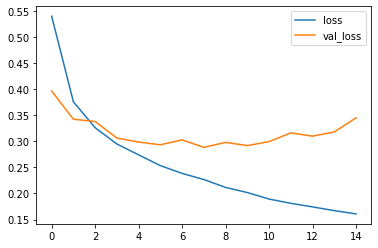

In [34]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

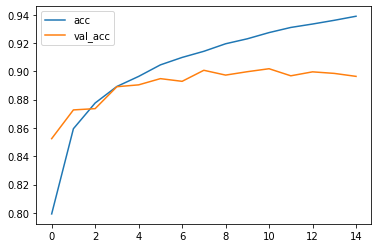

In [35]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [36]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8964
[0.3447721302509308, 0.896399974822998]


In [28]:
# Label mapping for fasion mnist
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

"""# this is used if testing is done on normal mnist
# Label mapping
labels = '''0
1
2
3
4
5
6
7
8
9'''.split("\n")"""

'# this is used if testing is done on normal mnist\n# Label mapping\nlabels = \'\'\'0\n1\n2\n3\n4\n5\n6\n7\n8\n9\'\'\'.split("\n")'

Confusion matrix, without normalization
[[834   0  17  18   1   1 118   0  11   0]
 [  1 968   0  19   1   0   9   0   2   0]
 [ 16   1 805  13  70   1  90   0   4   0]
 [  9   2   9 937  15   0  28   0   0   0]
 [  0   1  32  47 860   0  59   0   1   0]
 [  0   0   0   2   0 981   0  13   0   4]
 [101   0  48  34 114   0 690   0  13   0]
 [  0   0   0   0   0  14   0 944   0  42]
 [  2   0   2   4   4   3   5   4 976   0]
 [  0   0   0   0   0   6   1  24   0 969]]


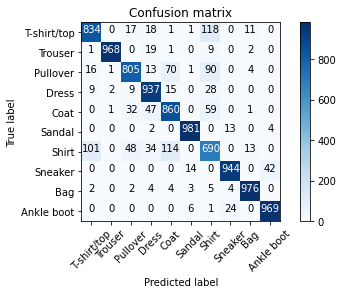

In [37]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, labels)



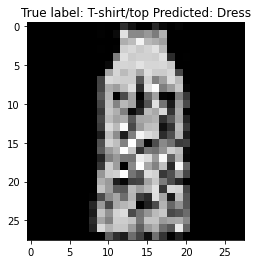

In [38]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));